In [1]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_path = '/content/drive/My Drive/fruit1.zip'
extract_path = '/content/dataset1'

Mounted at /content/drive


In [2]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
data_dir = extract_path
IMG_SIZE = (100, 100)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

In [5]:
#Data augmentation and splitting
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Get number of classes
num_classes = len(train_generator.class_indices)

Found 7760 images belonging to 5 classes.
Found 1940 images belonging to 5 classes.


In [6]:
#CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu')
       ,
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
EPOCHS = 50
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

model.save("fruit_classifier.h5")
print("Model saved as fruit_classifier.h5")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


242/242 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.3727 - loss: 1.4215 - val_accuracy: 0.4667 - val_loss: 1.2224
Epoch 2/50
  1/242 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5000 - loss: 1.0413

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5000 - loss: 1.0413 - val_accuracy: 0.5000 - val_loss: 1.1506
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - accuracy: 0.5306 - loss: 1.1240 - val_accuracy: 0.5312 - val_loss: 1.1479
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6875 - loss: 0.9191 - val_accuracy: 0.5500 - val_loss: 0.9960
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 37s 138ms/step - accuracy: 0.5590 - loss: 1.0846 - val_accuracy: 0.5063 - val_loss: 1.1785
Epoch 6/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.7188 - loss: 0.7280 - val_accuracy: 0.4500 - val_loss: 1.2540
Epoch 7/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.5963 - loss: 1.0179 - val_accuracy: 0.5406 - val_loss: 1.0901
Epoch 8/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6875 - loss: 0.9461 - val_accuracy: 0.4500 - val_loss: 1.3743
Epoch 9/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 32s 131ms/step - accuracy: 0.6150 - loss: 0.9841 - val_accurac

Model saved as fruit_classifier.h5


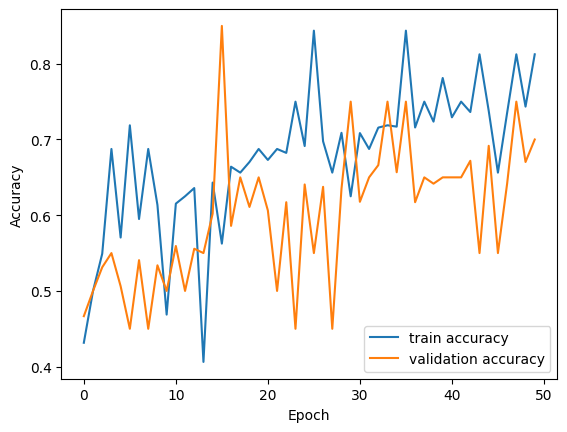

In [8]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
#Function to load and preprocess a single image for prediction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [10]:
# Prediction function
def predict_fruit(img_path, threshold=0.9):
    img_array = prepare_image(img_path)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    # Map class indices to labels
    class_labels = {v: k for k, v in train_generator.class_indices.items()}

    if confidence < threshold:
        print("The image is predicted to be: Not a fruit")
        return "Not a fruit"
    else:
        fruit_name = class_labels[predicted_class]
        print(f"The image is predicted to be: {fruit_name} with confidence {confidence:.2f}")
        return fruit_name


In [11]:
test_image_path = '/content/istockphoto-803721418-612x612.jpg'
predict_fruit(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
The image is predicted to be: Grape with confidence 1.00


'Grape'